In [1]:
# data manipulation
import pandas as pd
import numpy as np

# metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
import time
import os

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

from sklvq import GMLVQ as BaseGMLVQ
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier

# plotting
import matplotlib.pyplot as plt

# saving
import joblib

In [2]:
X_train = joblib.load('data/X_train_preprocessed.pkl')
X_test = joblib.load('data/X_test_preprocessed.pkl')
y_train = joblib.load('data/y_train_preprocessed.pkl')
y_test = joblib.load('data/y_test_preprocessed.pkl')

In [3]:
def c_matrix(preds):
    cm = confusion_matrix(y_test, preds, normalize='true')
    cmd = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
    cmd.plot(cmap=plt.cm.Oranges)
    plt.show()

In [4]:
class CustomGMLVQ(BaseGMLVQ):
    def predict(self, X):
        decision_values = self.decision_function(X)
        
        if self.classes_.size == 2:
            return self.classes_[(decision_values > 0).astype(np.int64)]  # Changed from np.int to np.int64
        
        return self.classes_[decision_values.argmax(axis=1)]


In [5]:
def create_model(num_neurons=32, dropout_rate=0.0, optimizer='adam'):
    model = Sequential()
    model.add(Dense(num_neurons, input_dim=X_train.shape[1], activation='relu'))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

### SVC

In [41]:
svc = joblib.load("models/svc.pkl")

/Users/federico/miniconda3/envs/data-mining/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.4.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [42]:
start = time.time()
svc_preds = svc.predict(X_test)
tempo_inferencia = time.time() - start

In [43]:
print(classification_report(y_test, svc_preds, digits=4))

              precision    recall  f1-score   support

           0     0.9188    0.8562    0.8864      2100
           1     0.4578    0.6159    0.5252       414

    accuracy                         0.8166      2514
   macro avg     0.6883    0.7361    0.7058      2514
weighted avg     0.8428    0.8166    0.8269      2514



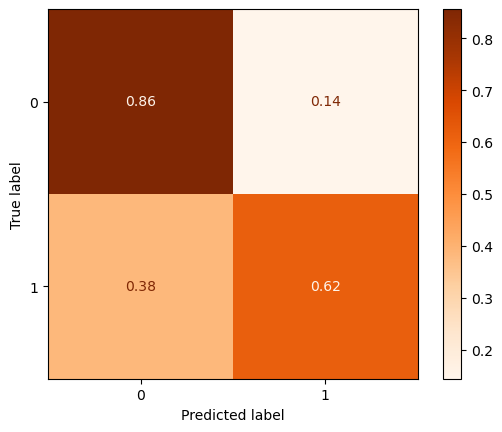

In [44]:
c_matrix(svc_preds)

In [45]:
print(f"Tempo de inferencia {tempo_inferencia:.2f} s")
print(f"Tamanho do modelo: {os.path.getsize('models/svc.pkl')/1e6:.2f} MB")

Tempo de inferencia 1.08 s
Tamanho do modelo: 4.56 MB


### KNN

In [3]:
knn = joblib.load("models/knn.pkl")

In [33]:
start = time.time()
knn_preds = knn.predict(X_test)
tempo_inferencia = time.time() - start

In [34]:
print(classification_report(y_test, knn_preds, digits=4))

              precision    recall  f1-score   support

           0     0.8774    0.8552    0.8662      2100
           1     0.3490    0.3937    0.3700       414

    accuracy                         0.7792      2514
   macro avg     0.6132    0.6245    0.6181      2514
weighted avg     0.7904    0.7792    0.7845      2514



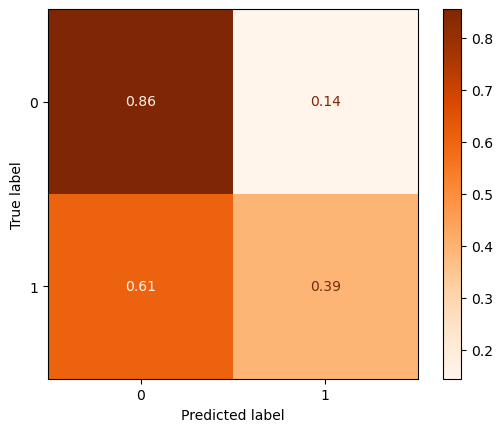

In [35]:
c_matrix(knn_preds)

In [39]:
print(f"Tempo de inferencia {tempo_inferencia:.2f} s")
print(f"Tamanho do modelo: {os.path.getsize('models/knn.pkl')/1e6:.2f} MB")

Tempo de inferencia 0.11 s
Tamanho do modelo: 10.19 MB


### Random Forest

In [46]:
rf = joblib.load("models/rf.pkl")

In [47]:
start = time.time()
rf_preds = rf.predict(X_test)
tempo_inferencia = time.time() - start

In [48]:
print(classification_report(y_test, rf_preds, digits=4))

              precision    recall  f1-score   support

           0     0.9097    0.9310    0.9202      2100
           1     0.6027    0.5314    0.5648       414

    accuracy                         0.8652      2514
   macro avg     0.7562    0.7312    0.7425      2514
weighted avg     0.8592    0.8652    0.8617      2514



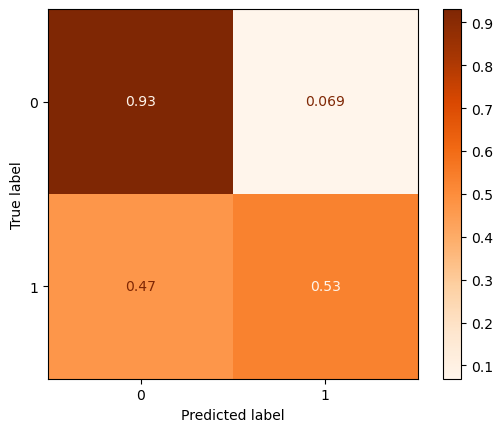

In [49]:
c_matrix(rf_preds)

In [50]:
print(f"Tempo de inferencia {tempo_inferencia:.2f} s")
print(f"Tamanho do modelo: {os.path.getsize('models/rf.pkl')/1e6:.2f} MB")

Tempo de inferencia 0.13 s
Tamanho do modelo: 51.15 MB


### MLP

In [ ]:
mlp = joblib.load("models/mlp.pkl")

/Users/federico/miniconda3/envs/data-mining/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator NearestNeighbors from version 1.4.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/federico/miniconda3/envs/data-mining/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 1.4.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/federico/miniconda3/envs/data-mining/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estim

In [ ]:
start = time.time()
mlp_preds = mlp.predict(X_test)
tempo_inferencia = time.time() - start

In [ ]:
print(classification_report(y_test, mlp_preds, digits=4))

              precision    recall  f1-score   support

           0     0.9193    0.8786    0.8985      2100
           1     0.4970    0.6087    0.5472       414

    accuracy                         0.8341      2514
   macro avg     0.7082    0.7436    0.7228      2514
weighted avg     0.8497    0.8341    0.8406      2514



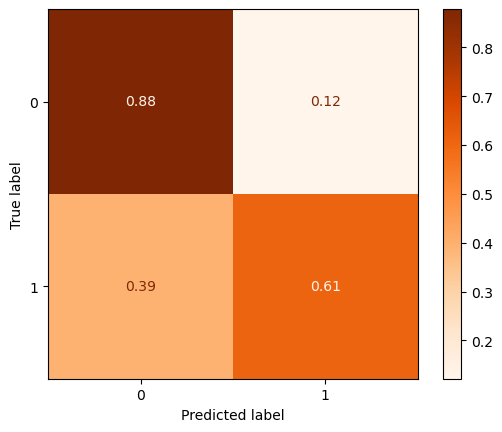

In [ ]:
c_matrix(mlp_preds)

In [ ]:
print(f"Tempo de inferencia {tempo_inferencia:.2f} s")
print(f"Tamanho do modelo: {os.path.getsize('models/mlp.pkl')/1e6:.2f} MB")

Tempo de inferencia 0.07 s
Tamanho do modelo: 1.16 MB


### Comitê de redes neurais

In [15]:
committee = joblib.load("models/committee_mlp.pkl")

In [17]:
start = time.time()
committee_preds = committee.predict(X_test)
tempo_inferencia = time.time() - start

In [18]:
print(classification_report(y_test, committee_preds, digits=4))

              precision    recall  f1-score   support

           0     0.8724    0.9700    0.9186      2100
           1     0.6480    0.2802    0.3912       414

    accuracy                         0.8564      2514
   macro avg     0.7602    0.6251    0.6549      2514
weighted avg     0.8354    0.8564    0.8318      2514



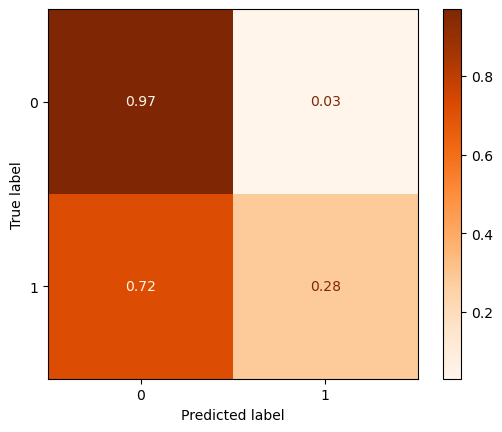

In [19]:
c_matrix(committee_preds)

In [20]:
print(f"Tempo de inferencia {tempo_inferencia:.2f} s")
print(f"Tamanho do modelo: {os.path.getsize('models/committee_mlp.pkl')/1e6:.2f} MB")

Tempo de inferencia 0.57 s
Tamanho do modelo: 1.12 MB


### Xgboost

In [64]:
xgb = joblib.load("models/xg.pkl")

/Users/federico/miniconda3/envs/data-mining/lib/python3.12/pickle.py:1759: UserWarning: [19:04:00] WARNING: /Users/runner/work/xgboost/xgboost/src/gbm/../common/error_msg.h:82: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  setstate(state)


In [65]:
start = time.time()
xgb_preds = xgb.predict(X_test)
tempo_inferencia = time.time() - start

In [66]:
print(classification_report(y_test, xgb_preds, digits=4))

              precision    recall  f1-score   support

           0     0.9206    0.9162    0.9184      2100
           1     0.5849    0.5990    0.5919       414

    accuracy                         0.8640      2514
   macro avg     0.7527    0.7576    0.7551      2514
weighted avg     0.8653    0.8640    0.8646      2514



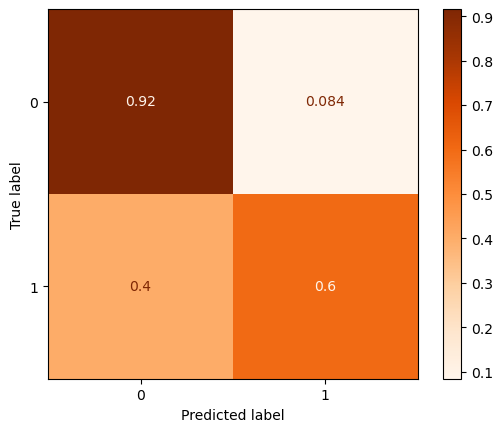

In [67]:
c_matrix(xgb_preds)

In [69]:
print(f"Tempo de inferencia {tempo_inferencia:.2f} s")
print(f"Tamanho do modelo: {os.path.getsize('models/xg.pkl')/1e6:.2f} MB")

Tempo de inferencia 0.03 s
Tamanho do modelo: 1.43 MB


### LVQ

In [34]:
lvq = joblib.load("models/lvq.pkl")

In [35]:
start = time.time()
lvq_preds = lvq.predict(X_test)
tempo_inferencia = time.time() - start

In [36]:
print(classification_report(y_test, lvq_preds, digits=4))

              precision    recall  f1-score   support

           0     0.9514    0.7276    0.8246      2100
           1     0.3700    0.8116    0.5083       414

    accuracy                         0.7414      2514
   macro avg     0.6607    0.7696    0.6665      2514
weighted avg     0.8557    0.7414    0.7725      2514



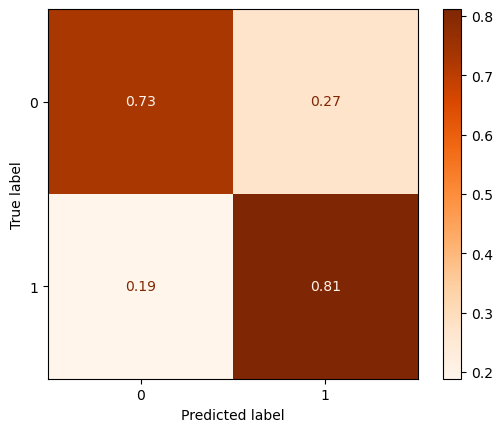

In [37]:
c_matrix(lvq_preds)

In [38]:
print(f"Tempo de inferencia {tempo_inferencia:.2f} s")
print(f"Tamanho do modelo: {os.path.getsize('models/lvq.pkl')/1e6:.2f} MB")

Tempo de inferencia 0.09 s
Tamanho do modelo: 0.54 MB


### Árvore de decisão

In [41]:
dt = joblib.load("models/dt.pkl")

/Users/federico/miniconda3/envs/data-mining/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.6.1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [42]:
start = time.time()
dt_preds = dt.predict(X_test)
tempo_inferencia = time.time() - start

In [43]:
print(classification_report(y_test, dt_preds, digits=4))

              precision    recall  f1-score   support

           0     0.8789    0.8748    0.8768      2100
           1     0.3797    0.3889    0.3842       414

    accuracy                         0.7947      2514
   macro avg     0.6293    0.6318    0.6305      2514
weighted avg     0.7967    0.7947    0.7957      2514



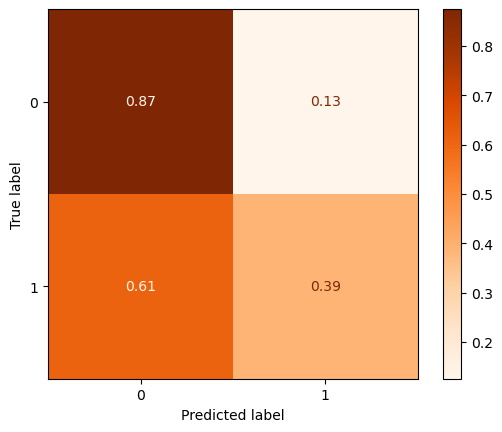

In [44]:
c_matrix(dt_preds)

In [45]:
print(f"Tempo de inferencia {tempo_inferencia:.2f} s")
print(f"Tamanho do modelo: {os.path.getsize('models/dt.pkl')/1e6:.2f} MB")

Tempo de inferencia 0.01 s
Tamanho do modelo: 0.10 MB


### Lightgbm

In [48]:
lightgbm = joblib.load("models/lightgbm.pkl")

/Users/federico/miniconda3/envs/data-mining/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.6.1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [49]:
start = time.time()
lighthbm_preds = lightgbm.predict(X_test)
tempo_inferencia = time.time() - start

In [50]:
print(classification_report(y_test, lighthbm_preds, digits=4))

              precision    recall  f1-score   support

           0     0.9008    0.9510    0.9252      2100
           1     0.6532    0.4686    0.5457       414

    accuracy                         0.8715      2514
   macro avg     0.7770    0.7098    0.7354      2514
weighted avg     0.8600    0.8715    0.8627      2514



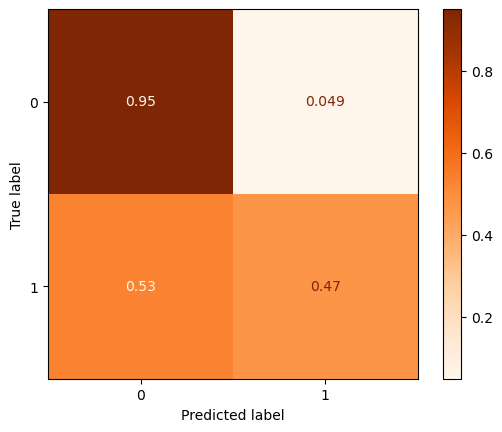

In [51]:
c_matrix(lighthbm_preds)

In [54]:
print(f"Tempo de inferencia {tempo_inferencia:.2f} s")
print(f"Tamanho do modelo: {os.path.getsize('models/lightgbm.pkl')/1e6:.2f} MB")

Tempo de inferencia 0.04 s
Tamanho do modelo: 0.35 MB


### Comitê heterogêneo

In [6]:
ch = joblib.load("models/ch.pkl")

In [7]:
start = time.time()
ch_preds = ch.predict(X_test)
tempo_inferencia = time.time() - start

c:\Users\brend\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [8]:
print(classification_report(y_test, ch_preds, digits=4))

              precision    recall  f1-score   support

           0     0.9018    0.9448    0.9228      2100
           1     0.6306    0.4783    0.5440       414

    accuracy                         0.8679      2514
   macro avg     0.7662    0.7115    0.7334      2514
weighted avg     0.8572    0.8679    0.8604      2514



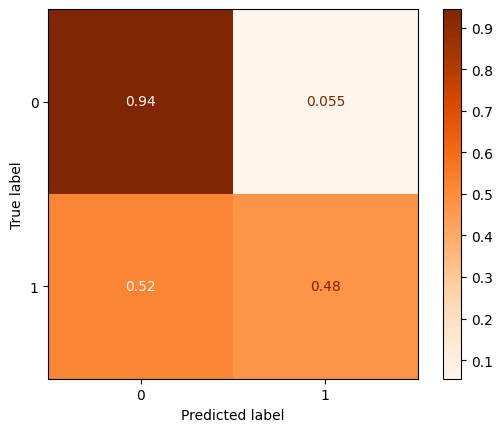

In [9]:
c_matrix(ch_preds)

In [10]:
print(f"Tempo de inferencia {tempo_inferencia:.2f} s")
print(f"Tamanho do modelo: {os.path.getsize('models/ch.pkl')/1e6:.2f} MB")

Tempo de inferencia 0.51 s
Tamanho do modelo: 19.67 MB
